In [294]:
# tensorflowはGPUを使った計算を行うため、学習を固定する。
# 結果に再現性を持たせる
import tensorflow as tf
import numpy as np
import random
import os

seed=200
tf.random.set_seed(seed)

# optional
# for numpy.random
np.random.seed(seed)
# for built-in random
random.seed(seed)
# for hash seed
os.environ["PYTHONHASHSEED"] = str(seed)

# データの読み込み

In [295]:
import pandas as pd
# 訓練データの読み込み
df = pd.read_table('/content/drive/MyDrive/Wine_Variety_Prediction/train.tsv', sep="\t")
# テストデータの読み込み
df_test = pd.read_table('/content/drive/MyDrive/Wine_Variety_Prediction/test.tsv', sep="\t")
# 訓練データを表示
df

,id,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
3,6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
4,9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,169,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
85,172,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
86,173,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
87,176,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750


In [296]:
# dfのYのデータをlabelに格納
y_train = df['Y']
y_train.head()

0    3
1    2
2    1
3    1
4    1
Name: Y, dtype: int64

In [297]:
# dfのデータフレームから、idとYを消す
df = df.drop('id',axis=1).drop('Y',axis=1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
3,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
4,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [298]:
# テストデータのdf_testもトレーニングデータと説明変数の数を合わせる. 13説明変数
test = df_test.drop('id',axis=1)
test.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630
3,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
4,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280


In [299]:
# 学習データdfに数値的なばらつきがあるため
# 標準化するためのライブラリをインポート
from sklearn.preprocessing import StandardScaler as SC
# インスタンスを生成
sc = SC()
'''
# sc関数を作って準備しておく、axis=1はデータを1次元になるようにする意味。
sc.fit(df.drop('Y',axis=1))
'''
sc.fit(df)
'''
# sc.transformでsc関数を適用して、pdでDataFrame型として格納する
dfs = pd.DataFrame(sc.transform(df.drop('Y',axis=1)),columns=df.drop('Y',axis=1).columns)
'''
dfs = pd.DataFrame(sc.transform(df), columns=df.columns)
# 標準化された訓練データを表示
dfs.head()
# テストデータも上記同様
# テスト用のデータを選び、トレーニングデータで作ったsc関数を適用
dfs_test = pd.DataFrame(sc.transform(test),columns=test.columns)
dfs_test

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.347625,-0.106092,-0.288847,-0.407695,0.315695,1.095308,1.273594,-1.061867,1.285169,0.281032,1.232022,0.817160,2.417299
1,0.284599,0.899895,-0.354763,-0.281706,-0.177232,-0.901927,-1.220143,1.956757,0.452780,2.303865,-1.785867,-1.582030,-0.222237
2,-1.120549,-1.015010,0.403274,1.104173,-1.585594,-0.554581,-0.469017,0.331344,-0.314324,-1.224430,1.494448,0.166777,-0.364488
3,-1.120549,-0.397298,-0.222930,-0.281706,-1.374340,-1.249272,-0.549138,1.260152,0.077389,-1.139615,0.488484,-0.483605,-0.838656
4,1.591998,-0.317878,1.095396,0.096261,1.371966,0.834799,1.093324,-0.210460,0.615993,0.471866,0.444747,0.065607,1.690241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.103251,-0.529665,-0.882093,-0.911651,0.034022,1.355817,1.343699,-1.139267,0.893456,0.429458,-0.255054,1.048407,0.757710
85,-0.436303,-0.812047,-1.211675,-0.710068,-0.036396,-0.519847,-0.639273,1.337552,-1.587389,0.281032,0.051109,-1.466406,-0.933490
86,0.492317,2.047073,1.556810,1.356151,0.808621,-0.589316,-1.089948,-0.674864,-0.787643,1.447236,-1.304754,-0.989459,-0.364488
87,-0.766207,-1.067956,-0.948010,-0.281706,-0.881413,2.085242,1.704239,-0.907066,0.583351,-0.249060,0.313534,0.239042,-0.269654


# t-SNE

In [300]:
import numpy as np

# y_trainをone hotから数値に変換

Y_train = []
for i in range(len(dfs)):
  a = y_train[i]
  Y_train.append(a)

y_train = np.array(Y_train)

In [303]:
# ラベルが1つずつ取り出されている
print(y_train.shape)
print('')
print(y_train)

(89,)

[3 2 1 1 1 3 3 2 1 1 1 2 3 3 2 2 1 1 1 2 3 1 3 2 3 2 1 2 3 1 2 1 2 3 2 2 2
 2 3 2 2 2 3 1 2 1 2 3 3 1 2 2 1 1 2 2 3 2 2 2 1 3 2 2 3 2 2 1 1 2 2 2 3 3
 2 2 3 3 1 1 1 1 3 1 2 3 1 3 1]


In [304]:
# トレーニングデータのdfsの形を確認
print(dfs.head())
print('')
print(dfs.shape)

    Alcohol  Malic acid  ...  OD280/OD315 of diluted wines   Proline
0 -0.778426    1.367591  ...                     -1.480859 -0.712211
1 -0.705114    1.897058  ...                      0.744895 -1.202185
2  0.064663   -0.450245  ...                      1.077313  0.441598
3  0.064663   -0.556138  ...                     -0.136735  1.137045
4  0.064663   -0.203161  ...                      0.860519  0.267736

[5 rows x 13 columns]

(89, 13)


In [305]:
# dfsのデータフレームをndarry型に変換する
dfs = np.array(dfs)
print(dfs)
print('')
print(dfs.shape)
# テストデータも
dfs_test = np.array(dfs_test)

[[-0.77842615  1.36759091 -0.02518151 ... -1.78586733 -1.48085902
  -0.71221127]
 [-0.70511406  1.8970577   1.12835369 ... -0.21131617  0.74489531
  -1.20218507]
 [ 0.06466291 -0.45024507 -0.94800966 ... -0.3862663   1.07731317
   0.44159798]
 ...
 [ 0.35791128 -0.27375614  0.96356295 ...  0.44474682  0.3402127
   1.65862967]
 [ 0.71225307  0.26453509  0.99652109 ... -0.99859175 -1.16289412
   0.01484661]
 [ 1.49424872  1.50878205  0.40327442 ... -0.34252876  1.33746627
   0.04645783]]

(89, 13)


(89, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


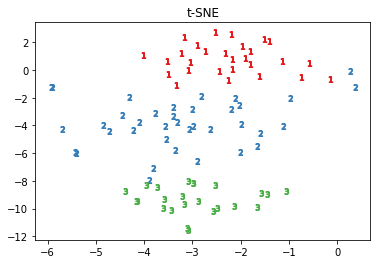

In [306]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNEをかけたデータを入れるため
x_train = []
x_test = []

def plot_sklearn_tsne():
    X_train = dfs
    print(X_train.shape)
    tsne = TSNE(n_components=2, random_state=0)
    proj = tsne.fit_transform(X_train[:89])
    X_test = tsne.fit_transform(dfs_test[:89])
    x_train.append(proj)
    x_test.append(X_test)
    
    cmp = plt.get_cmap("Set1")
    plt.figure()
    for i in range(3):
        select_flag = y_train[:89] == i+1
        plt_latent = proj[select_flag, :]
        plt.scatter(plt_latent[:,0], plt_latent[:,1], color=cmp(i), marker=f"${i+1}$")
    plt.title("t-SNE")
    plt.show()

if __name__ == "__main__":
    plot_sklearn_tsne()

In [307]:
# たぶん1次元目はいらない
x_train = np.asarray(x_train[0])
x_test = np.asarray(x_test[0])

In [308]:
x_train.shape

(89, 2)

In [310]:
x_test.shape

(89, 2)

# ランダムフォレストをかける

In [311]:
# ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

In [312]:
(train_x,test_x,train_y,test_y) = train_test_split(x_train,y_train,test_size = 0.3,random_state = 42)
# 訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割 

In [313]:
# 識別モデルの構築
random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)

# 予測値算出
y_pred = random_forest.predict(test_x)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 1.0
Accuracy: 0.9259259259259259


In [314]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       0.78      1.00      0.88         7
           3       1.00      0.91      0.95        11

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.92        27
weighted avg       0.94      0.93      0.93        27



Text(91.68, 0.5, 'true value')

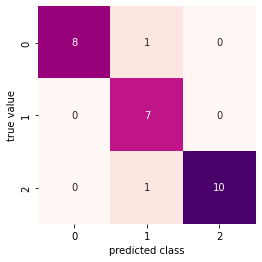

In [315]:
#confusion matrix
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [316]:
#どのデータを、どのクラスに分類したのか。
y_pred

array([2, 1, 2, 3, 1, 3, 3, 1, 1, 3, 2, 2, 3, 1, 1, 2, 3, 3, 3, 2, 1, 3,
       1, 2, 2, 3, 2])

In [317]:
# ランダムフォレストのパラメータの候補をいくつか決める
parameters = {
    'n_estimators' :[3,5,10,30,50],#作成する決定木の数
    'random_state' :[7,42],
    'max_depth' :[3,5,8,10],#決定木の深さ
    'min_samples_leaf': [2,5,10,20,50],#分岐し終わったノードの最小サンプル数
    'min_samples_split': [2,5,10,20,50]#決定木が分岐する際に必要なサンプル数
}

#グリッドサーチを使う
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=2)

#学習モデルを作成
clf.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'n_estimators': [3, 5, 10, 30, 50],
                         'random_state': [7, 42]})

In [318]:
#精度を確認
best_clf = clf.best_estimator_ #ここにベストパラメータの組み合わせが入っています
print('score: {:.2%}'.format(best_clf.score(train_x, train_y)))
y_pred = clf.predict(test_x)
print('score: {:.2%}'.format(best_clf.score(test_x, test_y)))

score: 98.39%
score: 96.30%


## 特徴量の重要度

In [319]:
# データフレーム型に変換
train_x = pd.DataFrame(train_x)

In [320]:
# 変数の重要度を可視化
importance = pd.DataFrame({ '変数' :train_x.columns, '重要度' :random_forest.feature_importances_})
importance

,変数,重要度
0,0,0.232966
1,1,0.767034


# 提出用データを作成

In [321]:
# 上でt-SNEをかけたテストデータで予測する
pred=clf.predict(x_test)
df_test['Y']=pred

In [322]:
df_test['Y']

0     2
1     1
2     1
3     1
4     2
     ..
84    2
85    1
86    1
87    2
88    2
Name: Y, Length: 89, dtype: int64

In [323]:
# 提出に必要なidとYをdf_testから取り出して、testにデータフレームとして格納する
test = pd.DataFrame({'id':df_test['id'], 'Y':df_test['Y']})

In [324]:
# ちゃんと格納されている確認
test

,id,Y
0,2,2
1,4,1
2,5,1
3,7,1
4,8,2
...,...,...
84,168,2
85,170,1
86,171,1
87,174,2


In [335]:
# testデータをteisyutu_nn.csvとして保存する
test.to_csv('teisyutu_radomforest.csv',header=False, index=False)

In [336]:
# 保存した提出データ読み込んでYに格納
Y = pd.read_csv('/content/teisyutu_radomforest.csv')

In [337]:
# 保存したデータを確認
Y

,2,2.1
0,4,1
1,5,1
2,7,1
3,8,2
4,10,2
...,...,...
83,168,2
84,170,1
85,171,1
86,174,2


In [329]:
Y.count()

2      88
2.1    88
dtype: int64